In [1]:
#back reaction

import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import numpy as np

#%% 

from astropy import constants as ast

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs.value           #constante de gravitacion universal en cgs
c = ast.c.cgs.value           #velocidad de la luz en cgs
#%%


from scipy import constants as sci
pi = sci.pi

#%%
eta_0 = 2.96e12 #son aproximadamente los 47k anios donde domina la rad
eta_b = 21969.3   #escala del bounce
a_b = 7.41155e-9 #factor de normalizacion del factor de escala
xini = eta_0/eta_b  #cte inicial en funcion de x

#definimos cte de normalizacion 
rho_rad_ini = (3*c**2/(8*pi*G))*(1/(a_b*eta_b)**2)*xini**2*(1+xini**2)**(-3)  #dens de rad inicial [erg/cm^3]
beta =1e-10
rho_bh_ini = beta*rho_rad_ini   

alfa = 2.36
M_min = 1e16
M_max = m_sol*1e6

cteA = (rho_bh_ini*(2-alfa))/(c**2*(M_max**(2-alfa)-M_min**(2-alfa)))

     

1. modificar omega por p 

2. empezar desde t=0 con p como incognita tambien 



In [2]:
import pandas as pd

from fractions import Fraction

In [34]:
num_eta = 100000

eta_pos = np.logspace(-20, np.log10(eta_0), num_eta)
#eta_neg = -eta_pos[::-1] 
eta_int = np.concatenate(([0], eta_pos))
x_int = eta_int/eta_b

In [20]:

print(x_int)

[0.00000000e+00 4.55180638e-25 1.84546189e-21 7.48214953e-18
 3.03352574e-14 1.22989769e-10 4.98643643e-07 2.02167615e-03
 8.19658391e+00 3.32318249e+04 1.34733469e+08]


In [35]:
ctes1 = ((8*pi*G)/(3*c**2)**(1/2))

ctes2 = (4*pi*G)/(3*c**2)

cte3 = c**2/(8*pi*G*a_b**2 * eta_b**2)

In [6]:
ctes1 = 1
ctes2 = 1
cte3 = 1

In [36]:
#defino varicion de la densidad de energia unicamente debido a la interaccion entre los fluidos
rho_bh = np.zeros_like(eta_int) 
delta_rho = np.zeros_like(eta_int) 
f_escala =  np.zeros_like(eta_int) 
da = np.zeros_like(eta_int)
f_escala[0] =  a_b

dda = np.zeros_like(eta_int)
rho_cf = np.zeros_like(eta_int)



Nm = 100
Masas = np.logspace(np.log10(M_min), np.log10(M_max),Nm)

hlog = (M_max/M_min)**(1/(Nm-1))

i = 0  

f_escala[0] =  a_b
rho_cf[0] = -5.63e16
rho_bh[0] = 5.63e16


for i in range(len(x_int)-1):
    x = x_int[i]

    P_cf = cte3*((x**2-2)/(1+x**2)**3)
    
    for M in Masas:
        M_i = M*f_escala[i]
        N_i = cteA*M**(-alfa)*f_escala[i]**(-3)   #densidad inicial de bhs en el bloque i

        delta = M*(hlog-1)

        rho_bh[i+1] = rho_bh[i+1]+ N_i*M_i*c**2*delta

        
    delta_x = abs(x_int[i+1]-x_int[i])

    da[i] = f_escala[i]**2*ctes1*(abs(rho_bh[i]+rho_cf[i]))**(1/2)

    dda[i] = ctes2*(rho_bh[i]+rho_cf[i]-3*P_cf)*f_escala[i]**3 

    f_escala[i+1] = f_escala[i] + da[i]*delta_x + (1/2)*dda[i]*(delta_x)**2

    delta_rho[0] = rho_bh[1] - rho_bh[0]*(f_escala[1]/f_escala[0])**3
    if i != 0:
        delta_rho[i+1] = rho_bh[i+1] - rho_bh[i]*(f_escala[i+1]/f_escala[i])**3

    rho_cf[i+1] = (rho_cf[i]-delta_rho[i])*(f_escala[i+1]/f_escala[i])**4

     

In [27]:
range(len(x_int)-1)

range(0, 200000)

nan

In [38]:
f_escala[0] =  a_b
rho_cf[0] = -5.63e16
rho_bh[0] = 5.63e16

P_cf = cte3*((x_int[1]**2-2)/(1+x_int[1]**2)**3)

da = f_escala[1]**2*ctes1*(abs(rho_bh[1]+rho_cf[1]))**(1/2)

dda = ctes2*(rho_bh[1]+rho_cf[1]-3*P_cf)*f_escala[1]**3 

delta_x = abs(x_int[2]-x_int[1])
f_escala_1 = f_escala[1] + da*delta_x + (1/2)*dda*(delta_x)**2

print(da, dda, delta_x, f_escala_1)

2.058791568675671e-33 1.535594698421447e-17 3.404597263495173e-28 7.41155e-09


In [37]:
print(ctes2*(rho_bh[0]+rho_cf[0]+3*P_cf)*f_escala[0]**3)

print(da**2/f_escala[0]**2)

-5.182986491647093e-05
1.4738725704387093e-33


In [34]:
P_cf = cte3*((x_int[0]**2-2)/(1+x_int[0]**2)**3)
P_cf

61.32581540385274

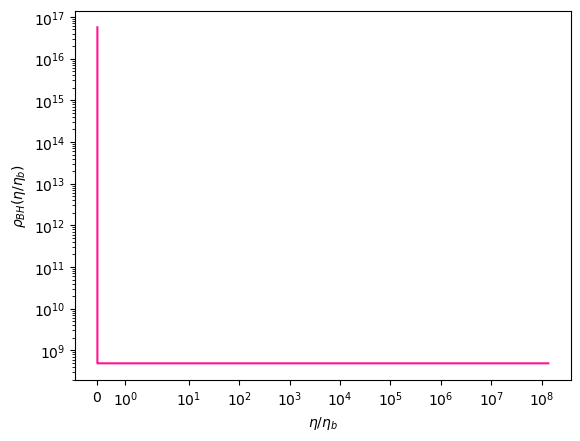

In [40]:
# plot results
plt.plot(x_int, rho_bh, color='deeppink')

plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$\rho_{BH}(\eta/\eta_b)$')
plt.yscale('log')

plt.show()

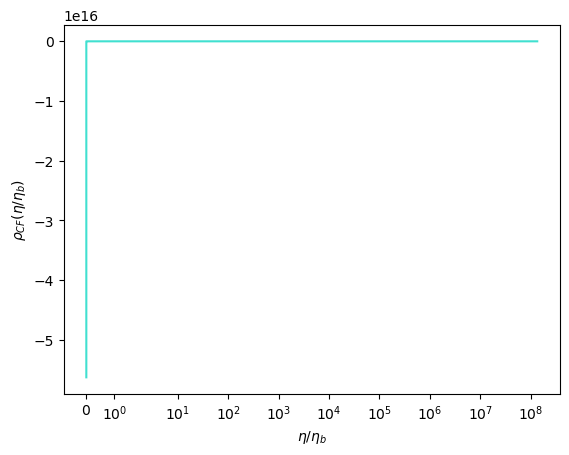

In [43]:
# plot results
plt.plot(x_int, rho_cf, color='turquoise')

plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$\rho_{CF}(\eta/\eta_b)$')
#plt.yscale('log')

plt.show()

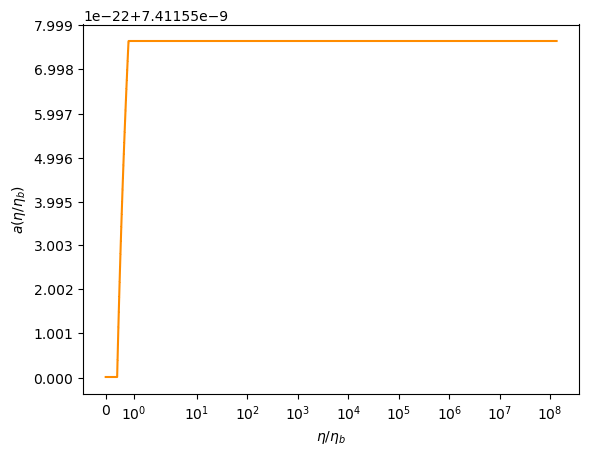

In [44]:
# plot results
plt.plot(x_int, f_escala, color='darkorange')

plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$a(\eta/\eta_b)$')
#plt.yscale('log')

plt.show()